In [99]:
# https://medium.com/@martinpella/customers-tweets-classification-41cdca4e2de
# https://stackabuse.com/text-classification-with-python-and-scikit-learn/
#https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a
# https://datascienceplus.com/multi-class-text-classification-with-scikit-learn/

# Import essentials
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os


In [100]:
train_df = pd.read_excel('train.xlsx') # Load the `train` file

In [101]:
test_df = pd.read_excel('test.xlsx') # Load the `test` file
#test_df.sample(frac=0.1)[:10] # Show a sample of the dataset

In [4]:
import re
from stop_words import get_stop_words

def special_char(text):
    """Retrieve the special characters
    """
    return re.sub(r'\W', ' ', text)

def filter_single(text):
    """remove all single characters
    """
    return re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

def filter_singleStart(text):
    """Remove single characters from the start
    """
    return re.sub(r'\^[a-zA-Z]\s+', ' ', text)

def filter_multiplespace(text):
    """Substituting multiple spaces with single space
    """
    return re.sub(r'\s+', ' ', text, flags=re.I)

def stop_words():
    """Retrieve the stop words for vectorization -Feel free to modify this function
    """
    return get_stop_words('es') + get_stop_words('ca') + get_stop_words('en')

def filter_mentions(text):
    """Utility function to remove the mentions of a tweet
    """
    return re.sub("@\S+", "", text)

def filter_hashtags(text):
    """Utility function to remove the hashtags of a tweet
    """
    return re.sub("#\S+", "", text)

def filter_symb_hashtag(text):
    """Utility function to remove the hashtags symbol of a tweet
    """
    return re.sub("#", "", text)

#def translate_text(text):
#    """Utility function to translate the text of a tweet
#    """
#    return translator.translate(text, dest='es').text

def lower_text(text):
    """Utility function to lower text
    """
    return text.lower()


def eliminate_emojiis(text):
    """Utility to eliminate emojiis from the text
    """
    em_pat=re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return  em_pat.sub(r'',text)

In [103]:
# remove emojis --> quedan emojis
train_df['text_noEm']=[eliminate_emojiis(row['text']) for index, row in train_df.iterrows()]

# from no emojiis we apply the other filters (we consider emojiis are not useful here...why?)
#train_df['text_noEm_noMentions'] = [filter_mentions(row['text_noEm']) for index, row in train_df.iterrows()]
#train_df['text_noEm_noHashtags'] = [filter_hashtags(row['text_noEm']) for index, row in train_df.iterrows()]
#train_df['text_noEm_noSymbHashtags'] = [filter_symb_hashtag(row['text_noEm']) for index, row in train_df.iterrows()]
train_df['text_noSymbHashtags'] = [filter_symb_hashtag(row['text']) for index, row in train_df.iterrows()]
# to spanish? with and without mentions and hashtags
#train_df['text_noEM_sp'] = [translate_text(row['text_noEm']) for index, row in train_df.iterrows()]
train_df['text_noSymbHashtags_more']=[special_char(row['text_noSymbHashtags']) for index, row in train_df.iterrows()]
train_df['text_noSymbHashtags_more']=[filter_single(row['text_noSymbHashtags']) for index, row in train_df.iterrows()]
train_df['text_noSymbHashtags_more']=[lower_text(row['text_noSymbHashtags']) for index, row in train_df.iterrows()]

#train_df['text_noEm']

# Pre-Processing
text_noMentions=[]
text_noHashtags=[]
text_spanish=[]
for index, row in train_df.iterrows():
    text_noMentions.append(filter_mentions(row['text'])) # text without mentions
    text_noHashtags.append(filter_hashtags(row['text'])) # text without hahstags
    text_spanish.append(translate_text(row['text']).text)

In [104]:
# Translate text to spanish and define column (vector) with language (spa:0, cat:1)
# !pip install langdetect
from langdetect import detect 
train_df['language'] = [detect(row['text']) for index, row in train_df.iterrows()]

# language column to 1-0 --> esta columna lang_val la ponemos al final del array (Xvec)
train_df['lang_val'] = np.where(train_df.language == 'ca', 1, 0)
train_df.head(5)

,Id,username,party,text,created_at,retweet_count,favorite_count,text_noEm,text_noSymbHashtags,text_noSymbHashtags_more,language,lang_val
0,0,martarovira,erc,Últim acte de campanya! Aquí tossudament alçat...,2017-12-19 20:12:01,785,2295,Últim acte de campanya! Aquí tossudament alçat...,Últim acte de campanya! Aquí tossudament alçat...,últim acte de campanya! aquí tossudament alçat...,ca,1
1,1,xavierdomenechs,comuns,#Badalona necessita uns pressupostos que posin...,2018-04-27 10:04:19,55,93,#Badalona necessita uns pressupostos que posin...,Badalona necessita uns pressupostos que posin ...,badalona necessita uns pressupostos que posin ...,ca,1
2,2,albert_rivera,cs,Encuentro Villacís-Valls para lanzar una estra...,2018-11-17 20:34:58,357,622,Encuentro Villacís-Valls para lanzar una estra...,Encuentro Villacís-Valls para lanzar una estra...,encuentro villacís-valls para lanzar una estra...,es,0
3,3,jaumecollboni,psc,"“La palabra es como una bala, no tiene retorno...",2018-10-22 18:10:01,4,6,"“La palabra es como una bala, no tiene retorno...","“La palabra es como una bala, no tiene retorno...","“la palabra es como una bala, no tiene retorno...",es,0
4,4,albiol_xg,ppc,"📻 Esta noche, a partir de las 22:10h, me entre...",2018-08-16 10:30:27,20,47,"Esta noche, a partir de las 22:10h, me entrev...","📻 Esta noche, a partir de las 22:10h, me entre...","📻 esta noche, a partir de las 22:10h, me entre...",es,0


In [8]:
#Translate to spanish (a vegades funciona) --> putada no podem fer-ho servir


In [9]:
# identify hashtags? fa falta?

In [10]:
# la part de lemmatizer --> # No esta per catala --> sino el podem traduir, no ho podem fer servir
#from nltk.stem import WordNetLemmatizer 
#wordnet_lemmatizer = WordNetLemmatizer()
#wordnet_lemmatizer.lemmatize('dogs')

### SVC with tfidf ( THIS IS THE GOOD ONE....) !!!
min_df: minimum number of documents that should contain this feature.
max_df: Here 0.7 means that we should include only those words that occur in a maximum of 70% of all the documents

In [110]:
# create the Vector
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(max_df=0.50,stop_words=stop_words(),ngram_range=(1, 4),min_df=0.0001,max_features=12000)
vectorizer = TfidfVectorizer(max_df=0.50,stop_words=stop_words(),ngram_range=(1, 4),min_df=2, max_features=8000)
#vectorizer = TfidfVectorizer(max_df=0.80,stop_words=stop_words(),ngram_range=(1, 6),min_df=0.0001,max_features=12000)
#Xvec = vectorizer.fit_transform(train_df['text_noEm_noSymbHashtags']).toarray()
#Xvec = vectorizer.fit_transform(train_df['text_noEm']).toarray()
#Xvec = vectorizer.fit_transform(train_df['text_noEm_noHashtags']).toarray()
Xvec = vectorizer.fit_transform(train_df['text_noSymbHashtags_more']).toarray()
#Xvec = vectorizer.fit_transform(train_df['text_noSymbHashtags']).toarray()
#Xvec = vectorizer.fit_transform(text_noHashtags).toarray()

yvec = train_df['party'].values
print(Xvec.shape)

(1920, 6633)


In [111]:
# amb aixo afegim la columna de 0,1 a Xvec en funcio idioma a Xvec_lang
a,b = Xvec.shape
Xvec_lang=np.zeros((a,b+1))
Xvec_lang[:,:-1]=Xvec
Xvec_lang[:,-1]=train_df['lang_val']
                 

In [130]:
# The model Linear SVC: Linear Support Vector Classification
from sklearn.svm import LinearSVC, LinearSVR, SVC
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import tree

# Split train and test
#X_train, X_test, y_train, y_test = train_test_split(Xvec, yvec, test_size=0.20)
pred_train = [] 
pred_test = [] 

X_train, X_test, y_train, y_test = train_test_split(Xvec, yvec, test_size=0.20, random_state=345 )


# My Model
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)


prediction_train = clf.predict(X_train)
prediction = clf.predict(X_test)

pred_train = (np.mean([prediction_train == y_train]))
pred_test =(np.mean([prediction == y_test])) 


print('pred_train:  = ', pred_train)
print('pred_test: = ',pred_test )


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,prediction))  
print(classification_report(y_test,prediction))  
print(accuracy_score(y_test, prediction))  

pred_train:  =  1.0
pred_test: =  0.5234375
[[28  5  4 16 11  7]
 [ 6 40  0  0 11  4]
 [ 5  0 29 21  6  4]
 [ 9  1 16 28  9  3]
 [ 2  3  1  3 46  5]
 [ 6  2  5  9  9 30]]
             precision    recall  f1-score   support

     comuns       0.50      0.39      0.44        71
         cs       0.78      0.66      0.71        61
        erc       0.53      0.45      0.48        65
      jxcat       0.36      0.42      0.39        66
        ppc       0.50      0.77      0.61        60
        psc       0.57      0.49      0.53        61

avg / total       0.54      0.52      0.52       384

0.5234375


In [121]:
y_train



array(['jxcat', 'psc', 'cs', ..., 'erc', 'ppc', 'psc'], dtype=object)

In [43]:
# http://queirozf.com/entries/scikit-learn-pipeline-examples#pipeline-for-text-classification-nlp
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LinearSVC()),
])

X_train, X_test, y_train, y_test = train_test_split(train_df['text_noSymbHashtags_more'], train_df['party'].values, test_size=0.20, random_state=345 )
param_grid = [
    { 
          "clf__penalty": ["l2"],
          "clf__dual":[False,True],
          "clf__C":[0.1, 1.0],
          "clf__fit_intercept":[True,False],
          "clf__intercept_scaling":[0.1,1,10,100],
          "vect__min_df":[1,2,3,4],
          "vect__ngram_range": [(1, 1), (1, 2),(1, 3)],
          "vect__stop_words":[stop_words()],
          "vect__max_features":[6000, 8000, 10000]
    },
    { 
          "clf__penalty": ["l1"],
          "clf__dual":[False],
          "clf__C":[0.1, 1.0],
          "clf__fit_intercept":[True,False],
          "clf__intercept_scaling":[0.1,1,10,100],
          "vect__min_df":[1,2,3,4],
          "vect__ngram_range": [(1, 1),(1, 2),(1, 3)],
          "vect__stop_words":[stop_words()],
          "vect__max_features":[6000, 8000, 10000]
    }
]

grid = GridSearchCV(pipeline, cv=6, param_grid=param_grid)
grid.fit(X_train,y_train)


print ("score = %3.2f" %(grid.score(X_test,y_test)) )
print (grid.best_params_ )

score = 0.72
{'clf__C': 1.0, 'clf__dual': False, 'clf__fit_intercept': True, 'clf__intercept_scaling': 1, 'clf__penalty': 'l2', 'vect__max_features': 8000, 'vect__min_df': 1, 'vect__ngram_range': (1, 1), 'vect__stop_words': ['a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'es

# scores

# LinearSVC

## test1 
score = 0.72  
{'clf__C': 1.0, 'clf__dual': False, 'clf__fit_intercept': True, 'clf__intercept_scaling': 1, 'clf__penalty': 'l2', 'vect__max_features': 8000, 'vect__min_df': 1, 'vect__ngram_range': (1, 1), 'vect__stop_words':

# Naive Bayes (Multinomial)
score = 0.67
{'clf__alpha': 0.1, 'vect__max_features': 6000, 'vect__min_df': 1, 'vect__ngram_range': (1, 3), 'vect__stop_words'

# LogisticRegression
score = 0.72
{'clf__C': 10, 'clf__dual': True, 'clf__fit_intercept': False, 'clf__penalty': 'l2', 'clf__solver': 'liblinear', 'clf__tol': 0.0001, 'vect__max_features': 6000, 'vect__min_df': 1, 'vect__ngram_range': (1, 3), 'vect__stop_words':



In [44]:
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

X_train, X_test, y_train, y_test = train_test_split(train_df['text_noSymbHashtags_more'], train_df['party'].values, test_size=0.20, random_state=345 )
param_grid = [
    { 
          "clf__alpha": [0.001,0.01, 0.1, 1, 10, 100],
          "vect__min_df":[1,2,3,4],
          "vect__ngram_range": [(1, 1), (1, 2),(1, 3)],
          "vect__stop_words":[stop_words()],
          "vect__max_features":[6000, 8000, 10000]
    }
]

grid = GridSearchCV(pipeline, cv=6, param_grid=param_grid)
grid.fit(X_train,y_train)


print ("score = %3.2f" %(grid.score(X_test,y_test)) )
print (grid.best_params_ )

score = 0.67
{'clf__alpha': 0.1, 'vect__max_features': 6000, 'vect__min_df': 1, 'vect__ngram_range': (1, 3), 'vect__stop_words': ['a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté',

In [15]:
# class sklearn.linear_model.LogisticRegression(penalty=’l2’,
#dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, 
#random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None)[source]¶
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression()),
])

X_train, X_test, y_train, y_test = train_test_split(train_df['text_noSymbHashtags_more'], train_df['party'].values, test_size=0.20, random_state=345 )
param_grid = [
    { 
          "clf__penalty": ["l2"],
          "clf__dual":[True],
          "clf__solver":['liblinear'],
          "clf__tol":[0.0001, 0.001, 0.01],
          "clf__C":[0.1,1,10],
          "clf__fit_intercept":[True, False],
          "vect__min_df":[1],
          "vect__ngram_range": [(1, 3)],
          "vect__stop_words":[stop_words()],
          "vect__max_features":[6000]
    },
    { 
          "clf__penalty": ["l2"],
          "clf__dual":[False],
          "clf__solver":['lbfgs','newton-cg','sag'],
          "clf__tol":[0.0001, 0.001, 0.01],
          "clf__C":[0.1,1,10],
          "clf__fit_intercept":[True, False],
          "vect__min_df":[1],
          "vect__ngram_range": [(1, 3)],
          "vect__stop_words":[stop_words()],
          "vect__max_features":[6000]
    },
    { 
          "clf__penalty": ["l1"],
          "clf__dual":[False],
          "clf__solver":['liblinear', 'saga'],
          "clf__tol":[0.0001, 0.001, 0.01],
          "clf__C":[0.1,1,10],
          "clf__fit_intercept":[True, False],
          "vect__min_df":[1],
          "vect__ngram_range": [(1, 3)],
          "vect__stop_words":[stop_words()],
          "vect__max_features":[6000]
    }
]
grid = GridSearchCV(pipeline, cv=6, param_grid=param_grid)
grid.fit(X_train,y_train)


print ("score = %3.2f" %(grid.score(X_test,y_test)) )
print (grid.best_params_ )

C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Pablo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

score = 0.72
{'clf__C': 10, 'clf__dual': True, 'clf__fit_intercept': False, 'clf__penalty': 'l2', 'clf__solver': 'liblinear', 'clf__tol': 0.0001, 'vect__max_features': 6000, 'vect__min_df': 1, 'vect__ngram_range': (1, 3), 'vect__stop_words': ['a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 

In [27]:
from sklearn.linear_model import LogisticRegressionCV

#clf = LogisticRegressionCV(cv=5, random_state=0,multi_class='multinomial').fit(X, y)

pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegressionCV()),
])

X_train, X_test, y_train, y_test = train_test_split(train_df['text_noSymbHashtags_more'], train_df['party'].values, test_size=0.20, random_state=345 )
param_grid = [
    { 
          "clf__cv": [2,5,8],
          "vect__min_df":[1],
          "vect__ngram_range": [(1,1),(1,2),(1, 3)],
          "vect__stop_words":[stop_words()],
          "vect__max_features":[6000]
    }
]
grid = GridSearchCV(pipeline, cv=6, param_grid=param_grid)
grid.fit(X_train,y_train)

print ("score = %3.2f" %(grid.score(X_test,y_test)) )
print (grid.best_params_ )

prediction_train = grid.predict(X_train)
prediction = grid.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,prediction))  
print(classification_report(y_test,prediction))  
print(accuracy_score(y_test, prediction))  

score = 0.72
{'clf__cv': 5, 'vect__max_features': 6000, 'vect__min_df': 1, 'vect__ngram_range': (1, 1), 'vect__stop_words': ['a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'est

In [32]:
prediction_train = grid.predict(X_train)
prediction = grid.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,prediction))  
print(classification_report(y_test,prediction))  
print(accuracy_score(y_test, prediction))  

print (grid.best_params_ )
print (grid.score(X_test,y_test))

[[36  7  5 14  1  8]
 [ 0 59  0  0  1  1]
 [ 4  2 34 23  2  0]
 [ 3  2  1 56  1  3]
 [ 1  6  0  2 51  0]
 [ 7  6  2  5  0 41]]
             precision    recall  f1-score   support

     comuns       0.71      0.51      0.59        71
         cs       0.72      0.97      0.83        61
        erc       0.81      0.52      0.64        65
      jxcat       0.56      0.85      0.67        66
        ppc       0.91      0.85      0.88        60
        psc       0.77      0.67      0.72        61

avg / total       0.74      0.72      0.72       384

0.7213541666666666
{'clf__alpha': 1e-05, 'clf__max_iter': 50, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 2)}
0.7213541666666666


In [114]:
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(Xvec, yvec, test_size=0.20, random_state=345 )

clf = MultinomialNB().fit(X_train, y_train)

prediction_train = clf.predict(X_train)
prediction = clf.predict(X_test)

print(confusion_matrix(y_test,prediction))  
print(classification_report(y_test,prediction))  
print(accuracy_score(y_test, prediction))  

[[32  9  6 15  1  8]
 [ 0 58  0  0  2  1]
 [ 1  1 41 21  1  0]
 [ 3  0 11 50  1  1]
 [ 0  8  1  2 49  0]
 [ 6  4  3  8  3 37]]
             precision    recall  f1-score   support

     comuns       0.76      0.45      0.57        71
         cs       0.72      0.95      0.82        61
        erc       0.66      0.63      0.65        65
      jxcat       0.52      0.76      0.62        66
        ppc       0.86      0.82      0.84        60
        psc       0.79      0.61      0.69        61

avg / total       0.72      0.70      0.69       384

0.6953125


In [34]:
from sklearn.linear_model import SGDClassifier

pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', SGDClassifier()),
])

X_train, X_test, y_train, y_test = train_test_split(train_df['text_noSymbHashtags_more'], train_df['party'].values, test_size=0.20, random_state=345 )

#clf = SGDClassifier(loss='log', penalty='l1',alpha=1e-6, max_iter=50,random_state=42).fit(X_train, y_train)

parameters = {
    #'vect__max_df': (0.5, 0.75, 1.0),
    # 'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    'clf__loss': ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'),
    'clf__alpha': (0.0001, 0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    'clf__max_iter': (10, 50, 80),
}

grid = GridSearchCV(pipeline, cv=6, param_grid=parameters)
grid.fit(X_train,y_train)

print ("score = %3.2f" %(grid.score(X_test,y_test)) )
print (grid.best_params_ )

prediction_train = grid.predict(X_train)
prediction = grid.predict(X_test)

print(confusion_matrix(y_test,prediction))  
print(classification_report(y_test,prediction))  
print(accuracy_score(y_test, prediction))  

score = 0.71
{'clf__alpha': 1e-05, 'clf__loss': 'hinge', 'clf__max_iter': 80, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 2)}
[[39  8  4 14  1  5]
 [ 0 58  0  0  2  1]
 [ 5  2 37 20  1  0]
 [ 4  3  6 50  1  2]
 [ 0  8  0  2 50  0]
 [ 7  5  4  5  1 39]]
             precision    recall  f1-score   support

     comuns       0.71      0.55      0.62        71
         cs       0.69      0.95      0.80        61
        erc       0.73      0.57      0.64        65
      jxcat       0.55      0.76      0.64        66
        ppc       0.89      0.83      0.86        60
        psc       0.83      0.64      0.72        61

avg / total       0.73      0.71      0.71       384

0.7109375


In [95]:
X_train, X_test, y_train, y_test = train_test_split(train_df['text_noSymbHashtags_more'], train_df['party'].values, test_size=0.20, random_state=345)

clf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-5, max_iter=80)

vectorizer = TfidfVectorizer(max_df=0.50,ngram_range=(1, 1),stop_words=stop_words(),min_df=1)


Xtrain1 = vectorizer.fit_transform(X_train)
ytrain1 = y_train

clf.fit(Xtrain1, ytrain1)

#X_test = vectorizer.transform(test['text_noSymbHashtags_more']).toarray()
Xtest1 = vectorizer.transform(X_test).toarray()

prediction_train = clf.predict(Xtrain1)
prediction = clf.predict(Xtest1)

pred_train = (np.mean([prediction_train == ytrain1]))
pred_test =(np.mean([prediction == y_test])) 


print('pred_train:  = ', pred_train)
print('pred_test: = ',pred_test )


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,prediction))  
print(classification_report(y_test,prediction))  
print(accuracy_score(y_test, prediction))  

pred_train:  =  1.0
pred_test: =  0.7239583333333334
[[42  1  7  6  1 14]
 [ 0 54  0  0  3  4]
 [ 3  0 40 18  4  0]
 [ 2  0 15 44  1  4]
 [ 1  5  1  1 51  1]
 [ 4  3  1  6  0 47]]
             precision    recall  f1-score   support

     comuns       0.81      0.59      0.68        71
         cs       0.86      0.89      0.87        61
        erc       0.62      0.62      0.62        65
      jxcat       0.59      0.67      0.62        66
        ppc       0.85      0.85      0.85        60
        psc       0.67      0.77      0.72        61

avg / total       0.73      0.72      0.72       384

0.7239583333333334


In [58]:
# The model Linear SVC: Linear Support Vector Classification
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# Split train and test
#X_train, X_test, y_train, y_test = train_test_split(Xvec, yvec, test_size=0.20)
pred_train = [] 
pred_test = [] 

for i in range(50): # entre 10 y 50...aleatorio total.
 X_train, X_test, y_train, y_test = train_test_split(Xvec, yvec, test_size=0.10)


# My Model
 clf = LinearSVC(dual=False)
 clf.fit(X_train, y_train)


 prediction_train = clf.predict(X_train)
 prediction = clf.predict(X_test)

 pred_train.append(np.mean([prediction_train == y_train]))
 pred_test.append(np.mean([prediction == y_test])) 


plt.plot(pred_train)
plt.plot(pred_test)
plt.title('Linear SVC with Tdfidf and stop words')
plt.show()

plt.hist(pred_test)
print('pred_train: mean = ', np.mean(pred_train), ' max = ', np.max(pred_train),  ' min = ', np.min(pred_train), )
print('pred_test: mean = ', np.mean(pred_test), ' max = ', np.max(pred_test), ' min = ', np.min(pred_test), )

KeyboardInterrupt: 

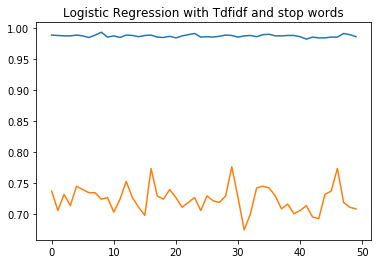

pred_train: mean =  0.9867447916666666  max =  0.9928385416666666  min =  0.9817708333333334
pred_test: mean =  0.7241666666666667  max =  0.7760416666666666  min =  0.6744791666666666


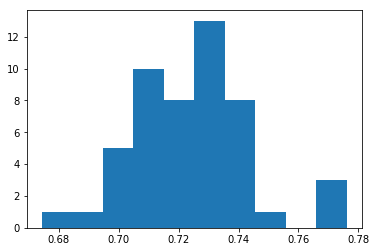

In [116]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split train and test
#X_train, X_test, y_train, y_test = train_test_split(Xvec, yvec, test_size=0.20)
pred_train = [] 
pred_test = [] 

for i in range(50): # entre 10 y 50...aleatorio total.
 X_train, X_test, y_train, y_test = train_test_split(Xvec, yvec, test_size=0.20)


# My Model
 #clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
 clf = LogisticRegression().fit(X_train, y_train)

 prediction_train = clf.predict(X_train)
 prediction = clf.predict(X_test)

 pred_train.append(np.mean([prediction_train == y_train]))
 pred_test.append(np.mean([prediction == y_test])) 


plt.plot(pred_train)
plt.plot(pred_test)
plt.title('Logistic Regression with Tdfidf and stop words')
plt.show()

plt.hist(pred_test)
print('pred_train: mean = ', np.mean(pred_train), ' max = ', np.max(pred_train),  ' min = ', np.min(pred_train), )
print('pred_test: mean = ', np.mean(pred_test), ' max = ', np.max(pred_test), ' min = ', np.min(pred_test), )

In [ ]:
from sklearn import manifold
n_components = 2
perplexity = 10
tsne = manifold.TSNE(n_components=n_components, init='random',random_state=0, perplexity=perplexity)
X_tsne = tsne.fit_transform(Xvec)

In [ ]:
X_tsne.shape
X_tsne

In [ ]:
#yvec2=yvec.tolist()

b,w = np.unique(yvec.tolist(), return_inverse=True)
print(b)
print(np.unique(w))
aux = np.unique(w)

#dic = dict(zip(b,aux))


In [ ]:
w

In [ ]:
import matplotlib.cm as cm
#With TSNE
plt.figure()
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1],c=w,cmap=cm.get_cmap('Accent'))
plt.title("T-SNE ")
plt.xlabel("1st Component")
plt.ylabel("2n Component")

#añadir leyenda (ni puta idea que fa aqui)
labels = np.unique(w)
labels2= b
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels2,loc='best')
plt.show()

In [ ]:
from sklearn import metrics

# this is only for the last iteration of the model performance
def plot_confusion_matrix(y, y_pred):
    plt.imshow(metrics.confusion_matrix(y, y_pred),
               cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true party')
    plt.xlabel('predicted party')
    plt.xticks( np.arange(6), yvec )
    plt.yticks( np.arange(6), yvec )
    
    
print ("classification accuracy:", metrics.accuracy_score(y_test, prediction))
plot_confusion_matrix(y_test, prediction)

In [ ]:
print (metrics.confusion_matrix(y_test, prediction) )

In [97]:
test = pd.read_excel('test.xlsx') # Load the `train` file
test.head()

,Id,text,retweet_count,favorite_count
0,0,Avui hem représ la Comissió Mixta amb el @gove...,67,103
1,1,"Torra anunció un ""otoño caliente"" para aumenta...",856,1501
2,2,Demà cal sortir als carrers per dir que #Barce...,144,174
3,3,“Cercàvem or i vam baixar a la mina.\nI la fos...,338,1560
4,4,"Molt senzill d'entendre, companya: \n1.- L'ALL...",4932,7253


In [98]:
test['text_noSymbHashtags'] = [filter_symb_hashtag(row['text']) for index, row in test.iterrows()]
# to spanish? with and without mentions and hashtags
#train_df['text_noEM_sp'] = [translate_text(row['text_noEm']) for index, row in train_df.iterrows()]
test['text_noSymbHashtags_more']=[special_char(row['text_noSymbHashtags']) for index, row in test.iterrows()]
test['text_noSymbHashtags_more']=[filter_single(row['text_noSymbHashtags']) for index, row in test.iterrows()]
test['text_noSymbHashtags_more']=[lower_text(row['text_noSymbHashtags']) for index, row in test.iterrows()]



from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC


vectorizer = TfidfVectorizer(max_df=0.50,ngram_range=(1, 1),stop_words=stop_words(),min_df=1)

X_train = vectorizer.fit_transform(train_df['text_noSymbHashtags']).toarray()
y_train = train_df['party'].values

# 1 Train the classifier
clf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-5, max_iter=80)
clf.fit(X_train, y_train)

# 2 Predict the data (We need to tokenize the data using the same vectorizer object)
X_test = vectorizer.transform(test['text_noSymbHashtags_more']).toarray()
prediction = clf.predict(X_test)

# 3 Create a the results file
output = pd.DataFrame({'Party': prediction})
output.index.name = 'Id'
output.to_csv('sample_submission.csv')

# TIP - Copy and paste this function to generate the output file in your code
def save_submission(prediction):
    import datetime
    t = datetime.datetime.now().strftime("%Y%m%d-%H:%M:%S")
    output = pd.DataFrame({'Party': prediction})
    output.index.name = 'Id'
    output.to_csv(f'sample_submission{t}.csv')